# Experiments on hyperparameters

In [12]:
import sys
import os

# Add the absolute path to 'src' folder
sys.path.append(os.path.abspath("src"))

import numpy as np
import matplotlib.pyplot as plt
from typing import List
from layer import Layer
from linear import Linear
from activations import ActivationReLU, ActivationSigmoid
from sequential import Sequential
from utils import mean_squared_error, InformantStrategy
from data import load_data
from pso import ParticleSwarmOptimisation, AccelerationCoefficients

Final particle fitness: 0.03490458312119492
Final particle position sample: [ 0.01258316 -0.02383781  0.01588338 -0.01096047 -0.05255139]


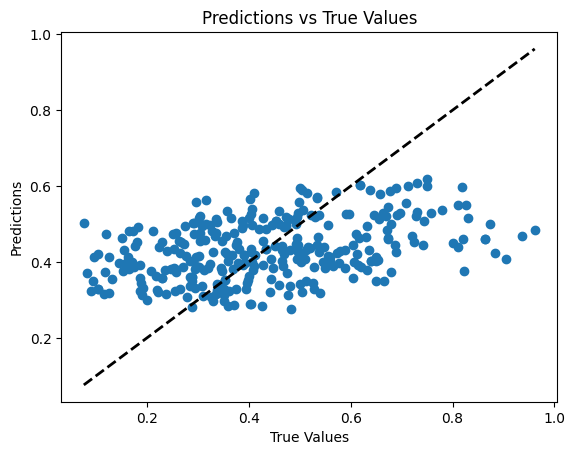

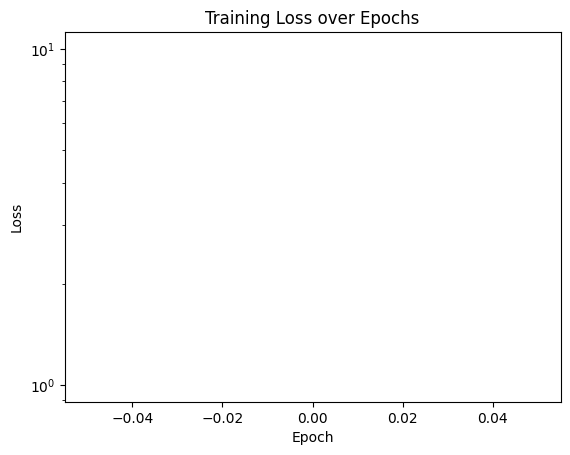

Test Accuracy: 67.78%
Train Accuracy: 64.73%

Params:
model: MLP with layers ['Linear', 'ActivationReLU', 'Linear', 'ActivationReLU', 'Linear']
swarm_size: 30
epochs: 100
accel_coeff: AccelerationCoefficients(inertia_weight=0.729, cognitive_weight=1.49, social_weight=1.49, global_best_weight=0.5, jump_size=0.1, max_velocity=0.2, max_position=1.0)
num_informants: 4
loss_function: mean_squared_error



In [ ]:
(train_features, train_targets), (test_features, test_targets) = load_data(
        "./data/concrete_data.csv"
    )
mlp = Sequential(
    Linear(size_input=train_features.shape[1], size_hidden=8),
    ActivationReLU(),
    Linear(size_input=8, size_hidden=4),
    ActivationReLU(),
    Linear(size_input=4, size_hidden=1),
    )

predictions = mlp.forward(test_features.T)

# plt.scatter(test_targets, predictions)
# plt.xlabel("True Values")
# plt.ylabel("Predictions")
# plt.title("Predictions vs True Values")
# plt.plot([test_targets.min(), test_targets.max()], [test_targets.min(), test_targets.max()], 'k--', lw=2)
# plt.show()

swarm_size = 40
epochs = 100
accel_coeff = AccelerationCoefficients(
    inertia_weight=0.729,
    cognitive_weight=1.49,
    social_weight=1.49,
    global_best_weight=0.5,
    jump_size=0.1,
    max_velocity=0.2,
    max_position=1.0,
)
num_informants = 4
particle_initial_position_scale = (0.05, 0.05)
loss_function = mean_squared_error
informants_strategy = InformantStrategy.KNEAREST

pso = ParticleSwarmOptimisation(
    X=train_features.T,
    Y=train_targets,
    swarm_size=swarm_size,
    accel_coeff=accel_coeff,
    num_informants=num_informants,
    loss_function=loss_function,
    particle_initial_position_scale=particle_initial_position_scale,
    model=mlp,
)

(final_position, final_score, losses) = pso.train(epochs, informants_strategy)
print(f"Final particle fitness: {final_score}")
print(f"Final particle position sample: {final_position[:5]}")
mlp.from_vector(final_position)
predictions = mlp.forward(test_features.T)

plt.scatter(test_targets, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("Predictions vs True Values")
plt.plot(
    [test_targets.min(), test_targets.max()],
    [test_targets.min(), test_targets.max()],
    "k--",
    lw=2,
)
plt.show()

plt.plot(losses)
plt.yscale("log")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss over Epochs")
plt.show()

# Accuracy
test_accuracy = pso.get_accuracy(test_features.T, test_targets)
print(f"Test Accuracy: {test_accuracy:.2f}%")

train_accuracy = pso.get_accuracy(train_features.T, train_targets)
print(f"Train Accuracy: {train_accuracy:.2f}%")


print(f"""
Params:
model: MLP with layers {[type(layer).__name__ for layer in mlp.layers]}
swarm_size: {swarm_size}
epochs: {epochs}
accel_coeff: {accel_coeff}
num_informants: {num_informants}
loss_function: {loss_function.__name__}
""")

# print("Final loss", losses[-1])